In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
from utility_db_25 import get_momentum_cols, create_momentum_index, get_final_features, get_motion_cols, motion_complexity_score

In [2]:
root_dir = os.getcwd()

Temporary complexity_score rework:

In [3]:
def motion_complexity_score(data, motion_cols):
    dir_cols=['dir_standard|mean|C_1',
    'dir_standard|mean|C_2',
    'dir_standard|mean|FB_1',
    'dir_standard|mean|G_1',
    'dir_standard|mean|G_2',
    'dir_standard|mean|G_3',
    'dir_standard|mean|ILB_1',
    'dir_standard|mean|RB_1',
    'dir_standard|mean|RB_2',
    'dir_standard|mean|TE_1',
    'dir_standard|mean|TE_2',
    'dir_standard|mean|TE_3',
    'dir_standard|mean|T_1',
    'dir_standard|mean|T_2',
    'dir_standard|mean|T_3',
    'dir_standard|mean|T_4',
    'dir_standard|mean|WR_1',
    'dir_standard|mean|WR_2',
    'dir_standard|mean|WR_3',
    'dir_standard|mean|WR_4',
    'dir_standard|mean|WR_5']
    x_cols=['x_standard|mean|C_1',
    'x_standard|mean|C_2',
    'x_standard|mean|FB_1',
    'x_standard|mean|G_1',
    'x_standard|mean|G_2',
    'x_standard|mean|G_3',
    'x_standard|mean|ILB_1',
    'x_standard|mean|RB_1',
    'x_standard|mean|RB_2',
    'x_standard|mean|TE_1',
    'x_standard|mean|TE_2',
    'x_standard|mean|TE_3',
    'x_standard|mean|T_1',
    'x_standard|mean|T_2',
    'x_standard|mean|T_3',
    'x_standard|mean|T_4',
    'x_standard|mean|WR_1',
    'x_standard|mean|WR_2',
    'x_standard|mean|WR_3',
    'x_standard|mean|WR_4',
    'x_standard|mean|WR_5']
    y_cols=['y_standard|mean|C_1',
    'y_standard|mean|C_2',
    'y_standard|mean|FB_1',
    'y_standard|mean|G_1',
    'y_standard|mean|G_2',
    'y_standard|mean|G_3',
    'y_standard|mean|ILB_1',
    'y_standard|mean|RB_1',
    'y_standard|mean|RB_2',
    'y_standard|mean|TE_1',
    'y_standard|mean|TE_2',
    'y_standard|mean|TE_3',
    'y_standard|mean|T_1',
    'y_standard|mean|T_2',
    'y_standard|mean|T_3',
    'y_standard|mean|T_4',
    'y_standard|mean|WR_1',
    'y_standard|mean|WR_2',
    'y_standard|mean|WR_3',
    'y_standard|mean|WR_4',
    'y_standard|mean|WR_5']
    for c in dir_cols:
        data[c+'_QBdiff']=abs(data['dir_standard|mean|QB_1']-data[c].astype(float))
    for c in y_cols:
        data[c+'_QBdiff']=abs(data['y_standard|mean|QB_1']-data[c].astype(float))
    for c in x_cols:
        data[c+'_QBdiff']=abs(data['x_standard|mean|QB_1']-data[c].astype(float))
    data['QBdff_TE']=data[['dir_standard|mean|TE_1_QBdiff','dir_standard|mean|TE_2_QBdiff','dir_standard|mean|TE_3_QBdiff']].mean(axis=1).astype(float)
    data['QBdff_RB']=data[['dir_standard|mean|RB_1_QBdiff','dir_standard|mean|RB_2_QBdiff']].mean(axis=1).astype(float)
    data['QBdff_G']=data[['dir_standard|mean|G_1_QBdiff','dir_standard|mean|G_2_QBdiff','dir_standard|mean|G_3_QBdiff']].mean(axis=1).astype(float)
    data['QBdff_T']=data[['dir_standard|mean|T_1_QBdiff','dir_standard|mean|T_2_QBdiff','dir_standard|mean|T_3_QBdiff', 'dir_standard|mean|T_4_QBdiff']].mean(axis=1).astype(float)
    data['QBdff_WR']=data[['dir_standard|mean|WR_1_QBdiff','dir_standard|mean|WR_2_QBdiff','dir_standard|mean|WR_3_QBdiff', 'dir_standard|mean|WR_4_QBdiff', 'dir_standard|mean|WR_5_QBdiff']].mean(axis=1).astype(float)
    data['QBdffy_TE']=data[['y_standard|mean|TE_1_QBdiff','y_standard|mean|TE_2_QBdiff','y_standard|mean|TE_3_QBdiff']].mean(axis=1).astype(float)
    data['QBdffy_RB']=data[['y_standard|mean|RB_1_QBdiff','y_standard|mean|RB_2_QBdiff']].mean(axis=1).astype(float)
    data['QBdffx_RB']=data[['x_standard|mean|RB_1_QBdiff','x_standard|mean|RB_2_QBdiff']].mean(axis=1).astype(float)
    data['QB_RB1_offset']=np.sqrt(np.square(data['x_standard|mean|RB_1_QBdiff']) + np.square(data['y_standard|mean|RB_1_QBdiff']**2))
    data['QBdffy_G']=data[['y_standard|mean|G_1_QBdiff','y_standard|mean|G_2_QBdiff','y_standard|mean|G_3_QBdiff']].mean(axis=1).astype(float)
    data['QBdffy_T']=data[['y_standard|mean|T_1_QBdiff','y_standard|mean|T_2_QBdiff','y_standard|mean|T_3_QBdiff', 'y_standard|mean|T_4_QBdiff']].mean(axis=1).astype(float)
    data['QBdffy_WR']=data[['y_standard|mean|WR_1_QBdiff','y_standard|mean|WR_2_QBdiff','y_standard|mean|WR_3_QBdiff', 'y_standard|mean|WR_4_QBdiff', 'y_standard|mean|WR_5_QBdiff']].mean(axis=1).astype(float)
    data['presnap_motion_complexity']=data[motion_cols].sum(axis=1).fillna(0).astype(float)
    data['motion-momentum']= (data['presnap_motion_complexity']-data['presnap_momentum']).astype(float) #how many more people moved compared to how many shifted (over 2.5 yards)
    data['neg_Formations']=data[['offenseFormation_SINGLEBACK' ,'offenseFormation_I_FORM', 'offenseFormation_PISTOL']].sum(axis=1).astype(int)
    data['neg_alignment']=data[['receiverAlignment_1x1', 'receiverAlignment_2x1']].sum(axis=1).astype(int)
    data.drop(columns=['y_standard|mean|WR_1_QBdiff','y_standard|mean|WR_2_QBdiff','y_standard|mean|WR_3_QBdiff', 'y_standard|mean|WR_4_QBdiff', 'y_standard|mean|WR_5_QBdiff','y_standard|mean|RB_1_QBdiff','y_standard|mean|RB_2_QBdiff','y_standard|mean|T_1_QBdiff','y_standard|mean|T_2_QBdiff','y_standard|mean|T_3_QBdiff', 'y_standard|mean|T_4_QBdiff','y_standard|mean|G_1_QBdiff','y_standard|mean|G_2_QBdiff','y_standard|mean|G_3_QBdiff','y_standard|mean|TE_1_QBdiff','y_standard|mean|TE_2_QBdiff','y_standard|mean|TE_3_QBdiff', 'dir_standard|mean|WR_1_QBdiff','dir_standard|mean|WR_2_QBdiff','dir_standard|mean|WR_3_QBdiff', 'dir_standard|mean|WR_4_QBdiff', 'dir_standard|mean|WR_5_QBdiff','dir_standard|mean|RB_1_QBdiff','dir_standard|mean|RB_2_QBdiff','dir_standard|mean|T_1_QBdiff','dir_standard|mean|T_2_QBdiff','dir_standard|mean|T_3_QBdiff', 'dir_standard|mean|T_4_QBdiff','dir_standard|mean|G_1_QBdiff','dir_standard|mean|G_2_QBdiff','dir_standard|mean|G_3_QBdiff','dir_standard|mean|TE_1_QBdiff','dir_standard|mean|TE_2_QBdiff','dir_standard|mean|TE_3_QBdiff', 'offenseFormation_SINGLEBACK' ,'offenseFormation_I_FORM','offenseFormation_PISTOL','receiverAlignment_1x1', 'receiverAlignment_2x1'], inplace=True)
    data.drop(columns=motion_cols, inplace=True)
    data.drop(columns=dir_cols, inplace=True)
    data.drop(columns=y_cols, inplace=True)
    data.drop(columns=x_cols, inplace=True)
    return data

# Import data

In [4]:
df_plays = pd.read_csv(os.path.join(root_dir,'data/plays.csv'))

In [5]:
train_data=pd.read_csv(os.path.join(root_dir, "data/train_data.csv"))
test_data=pd.read_csv(os.path.join(root_dir, "data/test_data.csv"))

In [6]:
include_columns=[x for x in test_data.columns if '_def' not in x]+['pass_rate_def']
train_data=train_data[include_columns]
test_data = test_data[include_columns]

In [7]:
motion_cols=get_motion_cols(train_data.columns)
momentum_cols=get_momentum_cols(train_data.columns)
train_data=create_momentum_index(train_data, momentum_cols)
test_data=create_momentum_index(test_data, momentum_cols)

In [8]:
train_data = train_data.merge(df_plays[['gameId','playId','playAction','isDropback']].drop_duplicates(),how='left')

# Analyze formation, alignment impact on play-action

Play action should happen more from run formations; we verify:

In [9]:
# define for graphs
paf = (train_data.loc[:,[x for x in train_data.columns if 'Formation' in x]+['playAction']].corr()['playAction'][:-1])
psf = (train_data.loc[:,[x for x in train_data.columns if 'Formation' in x]+['isDropback']].corr()['isDropback'][:-1])
para = train_data.loc[:,[x for x in train_data.columns if 'receiverAlignment' in x]+['playAction']].corr()['playAction'][:-1]
psra = train_data.loc[:,[x for x in train_data.columns if 'receiverAlignment' in x]+['isDropback']].corr()['isDropback'][:-1]

# graph nonsense
ind = np.arange(7)
width = 0.3  

### Formation Analysis

I-Form, Pistol, Singleback more heavily correlated with PA than just passing (Jumbo, Wildcat too low-sample)

Notably, these three comprise "neg_formations"

Text(0.5, 0, 'Formation')

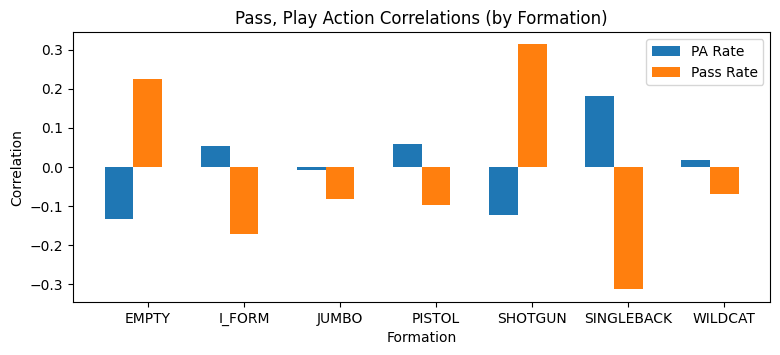

In [10]:
plt.figure(figsize=(9,3.5))
plt.bar(ind,paf,width,tick_label=[x.split('offenseFormation_')[1] for x in paf.index],label='PA Rate')
plt.bar(ind+width,psf,width,tick_label=[x.split('offenseFormation_')[1] for x in psf.index],label='Pass Rate')
plt.legend(loc='best')
plt.title('Pass, Play Action Correlations (by Formation)')
plt.ylabel('Correlation')
plt.xlabel('Formation')

### Alignment Analysis

2x2, 2x1 show the biggest relative signal for PA passes (1x1, 2x0 too small a sample)

Again, 2x1, 1x1 pop up in neg_alignments; however, 1x1 is a small sample

Text(0.5, 0, 'Alignment')

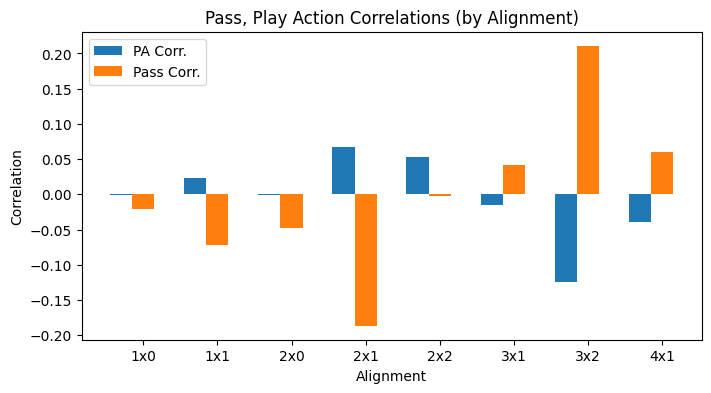

In [11]:
plt.figure(figsize=(8,4))
plt.bar(np.arange(8),para,width,tick_label=[x.split('receiverAlignment_')[1] for x in para.index],label='PA Corr.')
plt.bar(np.arange(8)+width,psra,width,tick_label=[x.split('receiverAlignment_')[1] for x in psra.index],label='Pass Corr.')
plt.legend(loc='best')
plt.title('Pass, Play Action Correlations (by Alignment)')
plt.ylabel('Correlation')
plt.xlabel('Alignment')

### Incorporate complexity score

This removes formation info, so don't want to mess stuff up earlier:

In [12]:
train_data=motion_complexity_score(train_data, motion_cols)
test_data=motion_complexity_score(test_data, motion_cols)

# Get play-action correlations, compare to run plays

Gist is, we want to see what differentiates a play-action pass from a run:

In [13]:
train_data['isRun'] = ~train_data['isDropback'].astype(bool)

In [14]:
#pa_corrs = train_data[[x for x in train_data.columns if 'TE_2' not in x and 'FB_1' not in x]].corr()['playAction'].sort_values(ascending=False)[3:]
pa_corrs = train_data.corr()['playAction'].sort_values(ascending=False)[3:]

Get play-action, run-play feature correlations, then compare the ordinal ranking of each feature w/r/t correlation:

In [15]:
# pa correlations
pac_df = pa_corrs.reset_index().sort_values(by='playAction',ascending=False)
pac_df['pa_rank'] = range(1,len(pac_df)+1)

# run correlations
rc_df = train_data.corr()['isRun'].reset_index().sort_values(by='isRun',ascending=False)
rc_df['db_rank'] = range(1,len(rc_df)+1)

# merge
pa_run_merged = pac_df.merge(rc_df,how='left',on='index')
pa_run_merged['ord_delta'] = pa_run_merged['db_rank'] - pa_run_merged['pa_rank']

Note that nominally, Tight Ends and Fullbacks have an immense weight on play-action. 

However, it's all about *impact relative to run plays*.

Comparing correlations ordinally, we see the 'TE_2' flag mainly tells us we're in a run-favorable formation, true for both runs and PA:

In [16]:
pa_run_merged.sort_values(by='playAction',ascending=False).iloc[5:15,:]

,index,playAction,pa_rank,isRun,db_rank,ord_delta
5,x_standard|std|QB_1,0.124477,6,0.215812,6,0
6,is_motion,0.116296,7,0.108375,22,15
7,x_standard|mean|WR_3_QBdiff,0.103405,8,0.246717,5,-3
8,o_standard|mean|TE_2,0.094608,9,0.214633,7,-2
9,dir_standard|std|TE_2,0.088798,10,0.204437,8,-2
10,time_remaining,0.088328,11,0.009909,137,126
11,a|max|TE_2,0.081130,12,0.185505,10,-2
12,s|max|TE_2,0.080004,13,0.170140,13,0
13,x_standard|std|TE_2,0.078242,14,0.163572,15,1
14,dis|sum|TE_2,0.076202,15,0.141185,17,2


What most differentiates play-action from runs are instead QB mobility factors (accel, sped, run_val, yac/ybc_att):

In [17]:
pa_run_merged[(pa_run_merged['playAction'] >= .03) & (pa_run_merged['playAction'] > pa_run_merged['isRun'])].sort_values(by='ord_delta',ascending=False).iloc[2:32,:].head(15)

,index,playAction,pa_rank,isRun,db_rank,ord_delta
29,a|max|QB_1,0.043508,30,-0.009857,191,161
27,run_val,0.051628,28,-0.003412,173,145
26,receiverAlignment_2x2,0.052488,27,0.001766,159,132
10,time_remaining,0.088328,11,0.009909,137,126
42,surface_fieldturf,0.032700,43,0.005294,151,108
53,x_standard|std|WR_1,0.030562,54,0.004212,155,101
51,motionSinceLineset|RB_2,0.030694,52,0.009109,141,89
36,yac_att,0.036771,37,0.019697,107,70
50,s|max|G_2,0.030910,51,0.015297,116,65
38,ybc_att,0.036089,39,0.025767,90,51


# Expore feature cross-correlation, hone in on play-action metric

We take our ordinal ranking differences above to find the features that best imply play action:

In [18]:
eda_cols = pa_run_merged[(pa_run_merged['playAction'] >= .03) & (pa_run_merged['playAction'] > pa_run_merged['isRun'])].sort_values(by='ord_delta',ascending=False).iloc[2:32,:].head(15)['index'].values.tolist()

We see that almost all our O-line features are highly cross-correlated, and thus only use one of them:

<Axes: >

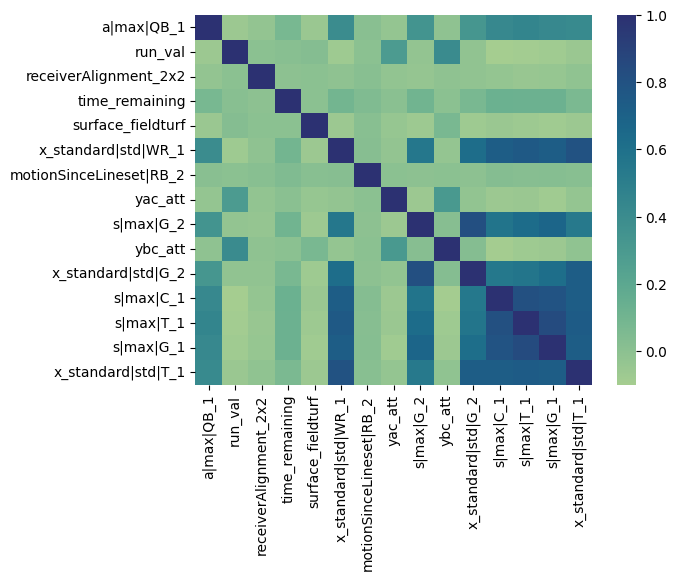

In [19]:
sns.heatmap(train_data[eda_cols].corr(), cmap="crest")

YAC/YBC features for QB runs redundant with each other and QB run value, so we don't use them:

<Axes: >

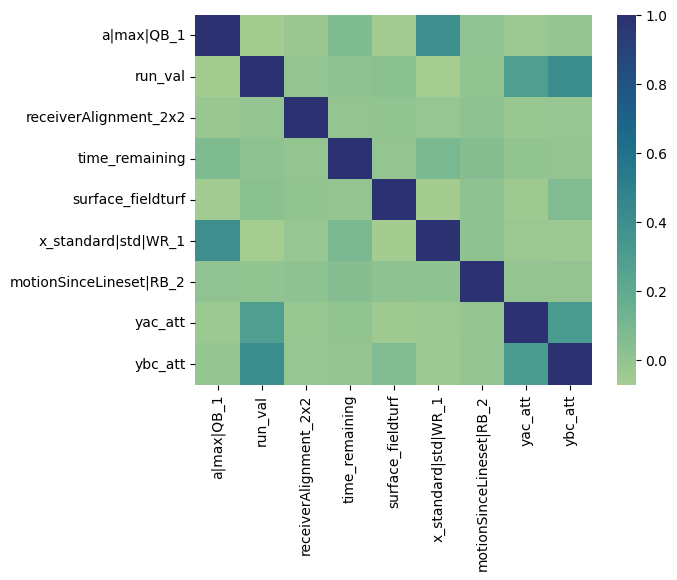

In [20]:
sns.heatmap(train_data[eda_cols[:-7]+['ybc_att']].corr(), cmap="crest")

### Calc rolling PA rate by team

In [21]:
df_games = pd.read_csv(os.path.join(root_dir,'data/games.csv'))

In [22]:
df_gw = train_data[['gameId','playId','possessionTeam','playAction']].merge(df_games[['gameId','week']],how='left').sort_values(by=['possessionTeam','week'])
df_gw.head(2)

,gameId,playId,possessionTeam,playAction,week
1383,2022091110,347,ARI,True,1
1384,2022091110,400,ARI,False,1


In [23]:
df_gw['pa_rolling'] = df_gw.groupby(['possessionTeam','week'])['playAction'].transform(lambda x: x.rolling(10, 1).mean())

todo: copy CI, mean code from elsewhere

In [24]:
gw_pa_sum = df_gw.groupby(['possessionTeam','week'])['playAction'].sum().reset_index()

In [26]:
gw_pa = gw_pa_sum.merge(df_gw.groupby(['possessionTeam','week'])['playAction'].count().rename('plays').reset_index(), on=['possessionTeam','week'])

In [27]:
gw_pa['pa_rate'] = gw_pa['playAction']/gw_pa['plays']

check each has a week blah blah blah

In [28]:
gw_pa['week']+=1

In [29]:
gw_pa['pa_rolling'] = gw_pa.groupby(['possessionTeam'])['pa_rate'].transform(lambda x: x.rolling(10, 1).mean())
gw_pa.head(10)

,possessionTeam,week,playAction,plays,pa_rate,pa_rolling
0,ARI,2,10,57,0.175439,0.175439
1,ARI,3,12,73,0.164384,0.169911
2,ARI,4,6,75,0.080000,0.139941
3,ARI,5,13,58,0.224138,0.160990
4,ARI,6,12,64,0.187500,0.166292
5,ARI,7,10,63,0.158730,0.165032
6,ARI,8,14,58,0.241379,0.175939
7,ARI,9,13,67,0.194030,0.178200
8,ATL,2,22,69,0.318841,0.318841
9,ATL,3,12,53,0.226415,0.272628


In [30]:
par_df = pd.concat([gw_pa[['possessionTeam','week','pa_rolling']],pd.DataFrame({'possessionTeam':[x for x in gw_pa['possessionTeam'].unique()],'week':1,'pa_rolling':.16})],axis=0).sort_values(by=['possessionTeam','week'])

In [31]:
par_df.head(3)

,possessionTeam,week,pa_rolling
0,ARI,1,0.160000
0,ARI,2,0.175439
1,ARI,3,0.169911


In [32]:
train_data = train_data.merge(par_df,how='left')

### Create IPA

IPA stands for Indicator of Play Action (working title); here we bake in all the features we can that aren't completely redundant (see: yac_att)

In [60]:
(.7* train_data['a|max|QB_1']  + .2*train_data['run_val'] + train_data['pa_rolling']+\
 train_data['receiverAlignment_2x2'] + train_data['motionSinceLineset|RB_2'] + .1*train_data['x_standard|std|WR_1']\
    + .1*train_data['s|max|G_2'] + train_data['surface_fieldturf'] + .05*train_data['time_remaining']).corr(train_data['playAction'])

0.12748903202142348

In [68]:
(train_data['a|max|QB_1']  + train_data['run_val'] + .5*train_data['pa_rolling'] +\
 -train_data['receiverAlignment_2x2'] \
    - .1*train_data['s|max|G_2']  - .5*train_data['time_remaining']).corr(train_data['isDropback'])

0.012014803355369672

In [64]:
train_data[['a|max|QB_1','run_val','pa_rolling','receiverAlignment_2x2','motionSinceLineset|RB_2',
                'x_standard|std|WR_1','s|max|G_2','surface_fieldturf','time_remaining','isDropback']].corr()['isDropback']

a|max|QB_1                 0.009857
run_val                    0.003412
pa_rolling                -0.026377
receiverAlignment_2x2     -0.001766
motionSinceLineset|RB_2   -0.009109
x_standard|std|WR_1       -0.004212
s|max|G_2                 -0.015297
surface_fieldturf         -0.005294
time_remaining            -0.009909
isDropback                 1.000000
Name: isDropback, dtype: float64

In [70]:
train_data[['a|max|QB_1','run_val','pa_rolling','receiverAlignment_2x2','motionSinceLineset|RB_2',
                'x_standard|std|WR_1','s|max|G_2','surface_fieldturf','time_remaining','playAction']].corr()['playAction']

a|max|QB_1                 0.043508
run_val                    0.051628
pa_rolling                 0.081177
receiverAlignment_2x2      0.052488
motionSinceLineset|RB_2    0.030694
x_standard|std|WR_1        0.030562
s|max|G_2                  0.030910
surface_fieldturf          0.032700
time_remaining             0.088328
playAction                 1.000000
Name: playAction, dtype: float64